<h1 align='center'>Giới thiệu về K-Means clustering (Phân cụm K-Means)</h1>

Phân cụm là kỹ thuật rất quan trọng trong khai phá dữ liệu, nó thuộc lớp các phương pháp Unsupervised Learning trong Machine Learning. Có rất nhiều định nghĩa khác nhau về kỹ thuật này, nhưng về bản chất ta có thể hiểu phân cụm là các qui trình tìm cách nhóm các đối tượng đã cho vào các cụm (clusters), sao cho các đối tượng trong cùng 1 cụm tương tự (similar) nhau và các đối tượng khác cụm thì không tương tự (Dissimilar) nhau.

Mục đích của phân cụm là tìm ra bản chất bên trong các nhóm của dữ liệu. Các thuật toán phân cụm (Clustering Algorithms) đều sinh ra các cụm (clusters). Tuy nhiên, không có tiêu chí nào là được xem là tốt nhất để đánh hiệu của của phân tích phân cụm, điều này phụ thuộc vào mục đích của phân cụm như: data reduction, “natural clusters”, “useful” clusters, outlier detection

Kỹ thuật phân cụm có thể áp dụng trong rất nhiều lĩnh vực như:

Marketing: Xác định các nhóm khách hàng (khách hàng tiềm năng, khách hàng giá trị, phân loại và dự đoán hành vi khách hàng,…) sử dụng sản phẩm hay dịch vụ của công ty để giúp công ty có chiến lược kinh doanh hiệu quả hơn;
Biology: Phận nhóm động vật và thực vật dựa vào các thuộc tính của chúng;
Libraries:  Theo dõi độc giả, sách, dự đoán nhu cầu của độc giả…;
Insurance, Finance: Phân nhóm các đối tượng sử dụng bảo hiểm và các dịch vụ tài chính, dự đoán xu hướng (trend) của khách hàng, phát hiện gian lận tài chính (identifying frauds);
WWW:  Phân loại tài liệu (document classification);  phân loại người dùng web (clustering weblog);…
 

## Thuật toán K-Means thực hiện qua các bước chính sau:
1.    Chọn ngẫu nhiên K tâm (centroid) cho K cụm (cluster). Mỗi cụm được đại diện bằng các tâm của cụm.
2.    Tính khoảng cách giữa các đối tượng (objects) đến K tâm (thường dùng khoảng cách Euclidean)
3.    Nhóm các đối tượng vào nhóm gần nhất
4.    Xác định lại tâm mới cho các nhóm
5.    Thực hiện lại bước 2 cho đến khi không có sự thay đổi nhóm nào của các đối tượng

In [111]:
# https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
# https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c

import pandas as pd

import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [112]:
# load dataset
dataset = pd.read_csv('../ds/kmeans-customer/Mall_Customers.csv')
print(dataset)
print(dataset.describe())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.

In [113]:
# https://towardsdatascience.com/k-means-clustering-implementation-2018-ac5cd1e51d0a
# https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
class KMeans ():
    def __init__(self, X, clusters, seed, iterations=300):
        random.seed(seed)

        self.K = clusters
        self.X = X
        self.iterations = iterations
        self.features = X.shape[1]
        self.data_size = X.shape[0]

    def initRandomCentroids(self, X):
        centroids = np.zeros((self.K, self.features))
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.data_size))]
            centroids[k] = centroid
        return centroids

    def intClusters(self, X, centroids):
        # Will contain a list of the points that are associated with that specific cluster
        clusters = [[] for _ in range(self.K)]

        # Loop through each point and check which is the closest cluster
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters

    def calculateNewCentroids(self, clusters, X):
        centroids = np.zeros((self.K, self.features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predictCluster(self, clusters, X):
        y_pred = np.zeros(self.data_size)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def labledData(self, X, y_pred):
        labeled_data = {}
        X_list = X.tolist()
        for i in range(y_pred.size):
            if y_pred[i] not in labeled_data:
                labeled_data[y_pred[i]] = [X_list[i]]
            else:
                labeled_data[y_pred[i]].append(X_list[i])

        for key in labeled_data:
            np_labled_data = labeled_data[key]
        return labeled_data

    # fit
    def fit(self):
        centroids = self.initRandomCentroids(self.X)

        for it in range(self.iterations):
            clusters = self.intClusters (self.X, centroids)

            previous_centroids = centroids
            centroids = self.calculateNewCentroids(clusters, self.X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # Get label predictions
        y_pred = self.predictCluster(clusters, self.X)

        # Get labeled data
        labeled_data = self.labledData(self.X, y_pred)

        wcss=0
        for k in range(self.K):
            wcss+=np.sum((np.array(labeled_data[k])-centroids[k])**2)

        return y_pred, centroids, wcss

In [114]:
def plotEbow(X, K, seed):
    wcss_array = []
    for k in range(1, K):
        y, centroids, wcss = KMeans(X, k, seed).fit()
        wcss_array = np.append(wcss_array, wcss)

    plt.plot(np.arange(1, K), wcss_array)
    plt.xlabel('Number of Clusters')
    plt.ylabel('within-cluster sums of squares (WCSS)')
    plt.title('Elbow method to determine optimum number of clusters')
    plt.show()

## Đánh giá số lượng features để phân cụm bằng Within Sum Square:
WCSS là phương pháp đánh giá khoảng cách trung bình của cụm tới trung tâm cụm đó. Để tính ra WCSS trước tiên ta cần tính ra khoảng cách Euclidean giữa từng điểm trong phân cụm tới tâm phân cụm đó. Sau khi tính được khoảng cách tất cả điểm trong phân cụm tới tâm phân cụm đó.
$$ \text{WCSS}=\sum _{i=1}^k \sum _{x=S_i} \|X-\mu _i\|^2

In [115]:
seed=170

Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied


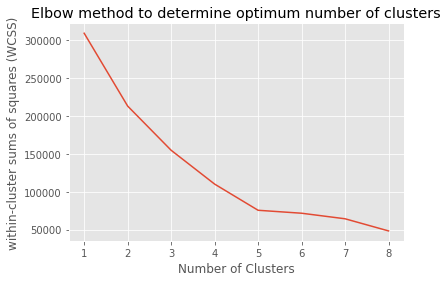

In [116]:
X = dataset.iloc[:, [1, 2, 3, 4]].values
plotEbow(X, 9, seed)

Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied
Termination criterion satisfied


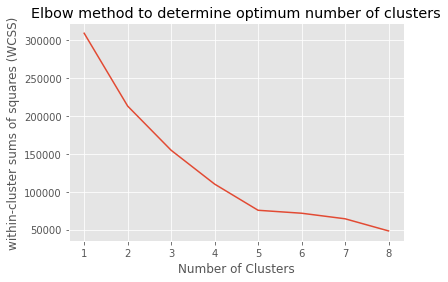

In [117]:
X = dataset.iloc[:, [2, 3, 4]].values
plotEbow(X, 9, seed)

Ở đây a thấy việc sử dung có hay không có features Gender không gây ảnh hưởng việc phân cụm nhóm dữ liệu, vậy nên để cho tối giản ta lựa chọn 3 features chính là <code>Age, Annual Income (k$), Spending Score (1-100)</code>

## **Lựa chọn Within-Cluster Sum of Square (WCSS)**

In [118]:
# Cluster and add label to dataset
model =  KMeans(X, 5, seed)
label, wcss = model.fit()

dataset['Label'] = label.tolist()
dataset

Termination criterion satisfied


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,3.0
1,2,1,21,15,81,2.0
2,3,0,20,16,6,3.0
3,4,0,23,16,77,2.0
4,5,0,31,17,40,3.0
...,...,...,...,...,...,...
195,196,0,35,120,79,1.0
196,197,0,45,126,28,4.0
197,198,1,32,126,74,1.0
198,199,1,32,137,18,4.0


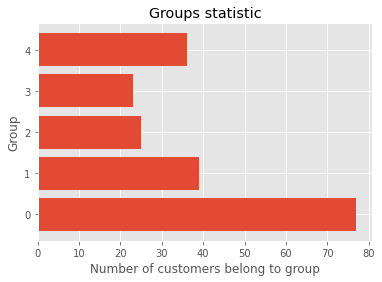

In [119]:
def plotGroupsStatistics(y):
    (unique, counts) = np.unique(y, return_counts=True)
    plt.style.use('ggplot')
    plt.barh(unique, counts)
    plt.xlabel('Number of customers belong to group')
    plt.ylabel('Group')
    plt.title('Groups statistic')
    plt.show()

plotGroupsStatistics(label)

In [120]:
gender_statistics = dataset.groupby(['Gender', 'Label'])['Gender'].size().reset_index(name='Count')
gender_statistics

,Gender,Label,Count
0,0,0.0,46
1,0,1.0,21
2,0,2.0,14
3,0,3.0,14
4,0,4.0,17
5,1,0.0,31
6,1,1.0,18
7,1,2.0,11
8,1,3.0,9
9,1,4.0,19


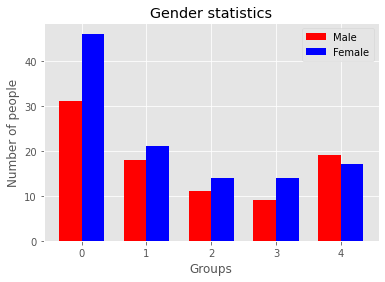

In [121]:
# visual gender per cluster
# !TODO https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

def plotGenderStatistics(dataset):
    data_len_haft = int(len(dataset.index)/2)
    # X value
    label = dataset['Label'].unique().tolist()
    # Y value
    female = dataset['Count'].iloc[:data_len_haft].values
    male = dataset['Count'].iloc[data_len_haft:].values
    # Bar setting
    x = np.arange(len(label))  # the label locations
    width = 0.35  # the width of the bars

    bar1 = plt.bar(x - width/2, male, width, color = 'r')
    bar2 = plt.bar(x + width/2, female, width, color='b')

    plt.xlabel('Groups')
    plt.ylabel('Number of people')
    plt.title('Gender statistics')

    plt.legend((bar1, bar2), ('Male', 'Female'))
    plt.show()

plotGenderStatistics(gender_statistics)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

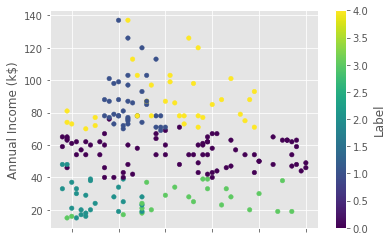

In [122]:
# gender_statistics.pivot(index='Label', columns='Gender', values='Count').plot(kind='bar')

dataset.plot.scatter(x='Age', y='Annual Income (k$)', c='Label', colormap='viridis')

In [123]:
def clusterVisuallizer(dataset, clusters):
    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    # plot lines
    for idx, val in df.iterrows():
        x = [val.Attack, val.cen_x,]
        y = [val.Defense, val.cen_y]
        plt.plot(x, y, c=val.c, alpha=0.2)
    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                       markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
    legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
    legend_elements.extend(cent_leg)
    plt.legend(handles=legend_elements, loc='upper right', ncol=2)
    # x and y limits
    plt.xlim(0,200)
    plt.ylim(0,200)
    # title and labels
    plt.title('Pokemon Stats\n', loc='left', fontsize=22)
    plt.xlabel('Attack')
    plt.ylabel('Defense')

IndentationError: expected an indented block (Temp/ipykernel_11672/2602184833.py, line 1)

In [ ]:
# visual cluster
# cluster group https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

# cluster heatmap
# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

# sumerizae
# https://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/